### <center>2018 Winter CS101.11</center>

# <center>堆、B树和跳表</center>

##### <center>by tanzhuxiaqiu@huawei.com</center>

## 今日议程

1. 堆
2. B树
3. 跳表

## 堆

- 必须是一个完全二叉树(Complete Binary Tree)
- 每个节点的值一定大于等于(或小于等于）其子树中所有节点的值
    - 大顶(根)堆
    - 小顶(根)堆
    
![](img/11-1.png)

### 堆的存储

- 完全二叉树可以用数组存储
- 如果数组的起始位置从下标1开始，那一个节点在在数组中下标为i，其左子节点就在数组下标为2i的位置，右子节点在数组下标2i+1的位置，父节点在数组下标i//2的位置
- 数组的起始元素开始位置也可以从下标1开始，这样左子节点，右子节点和父节点的下标分别为2i+1，2i+2,(i-1)//2

![](img/11-2.png)

### 往堆中插入元素

- 在堆的最后插入元素
- 如果插入后不能满足堆的特性，需要对堆进行调整让其重新满足堆的特性，这个过程称为**堆化(heapify)**
- 插入可以使用**从下至上堆化**的方式

![](img/11-3.png)

### Shift up 过程

![](img/11-4.png)

![](img/11-5.png)

### 删除堆顶元素

- 先用最后一个节点替换掉堆顶（根）节点
- 从根节点开始进行**从上至下的堆化**
- 注意在从上至下堆化时，两个子节点的元素大小都要关心

![](img/11-6.png)

### Shift down 过程

![](img/11-7.png)

![](img/11-8.png)

![](img/11-9.png)

### 用Python实现一个堆

In [1]:
from abc import ABC, abstractmethod


class AbstractHeap(ABC):
    """Abstract class for binary heap.
    """

    def __init__(self):
        pass

    @abstractmethod
    def siftUp(self, i):
        pass

    @abstractmethod
    def siftDown(self, i):
        pass

    @abstractmethod
    def insert(self, v):
        pass

    @abstractmethod
    def removeMax(self):
        pass

In [2]:
class Heap(AbstractHeap):
    def __init__(self):
        self._size = 0
        self._array = [(0)]

    def __repr__(self):
        return ' '.join(map(str, self._array[1:]))

    def insert(self, v):
        self._array.append(v)
        self._size += 1
        self.siftUp(self._size)

    def siftUp(self, i):
        while i // 2 > 0:
            if self._array[i] > self._array[i // 2]:
                self._array[i], self._array[i // 2] = self._array[
                    i // 2], self._array[i]
            i //= 2

    def removeMax(self):
        res = self._array[1]
        self._array[1] = self._array[self._size]
        self._size -= 1
        self._array.pop()
        self.siftDown(1)
        return res

    def siftDown(self, i):
        while 2 * i < self._size:
            max_child = self.maxChild(i)
            if self._array[i] < self._array[max_child]:
                self._array[i], self._array[max_child] = self._array[
                    max_child], self._array[i]
            i = max_child

    def maxChild(self, i):
        if 2 * i + 1 > self._size:  # no right child
            return 2 * i
        else:
            # left child > right child
            if self._array[2 * i] > self._array[2 * i + 1]:
                return 2 * i
            else:
                return 2 * i + 1

In [3]:
heap = Heap()
heap.insert(33)
heap.insert(17)
heap.insert(21)
heap.insert(11)
heap.insert(13)
heap.insert(15)
heap.insert(9)
heap.insert(1)
heap.insert(2)
heap.insert(7)
heap.insert(12)
heap.insert(10)
heap

33 17 21 11 13 15 9 1 2 7 12 10

In [4]:
heap.insert(24)
heap

33 17 24 11 13 21 9 1 2 7 12 10 15

In [5]:
heap.removeMax()
heap

24 17 21 11 13 15 9 1 2 7 12 10

### 堆操作的时间复杂度

|Operation|Time Complexity|
|---|---|
|Insert(v)|$O(log n)$|
|removeMax() / removeMin()|$O(log n)$|
|getMax() / getMin()|$O(1)$|

> 思考：如果让一个无序的元素数组通过堆化构造成一个堆，这个操作的时间复杂度是多少？$n O(log n)$?

## 堆排序

- 将元素构建成大（小）顶堆
- 依次将堆顶元素取出完成排序


### 建堆

- 可以通过前面堆实现的insert方法来依次将每个元素插入堆中，但这不是最优解
- 可以从最后一个非叶子节点开始，从上往下堆化(siftDown)

![](img/11-10.png)

![](img/11-11.png)

![](img/11-12.png)

![](img/11-13.png)

![](img/11-14.png)

In [6]:
def heapify(arr, n, i):
    largest = i
    lchild = 2 * i
    rchild = 2 * i + 1

    if lchild < n and arr[i] < arr[
            lchild]:  # exist left child and left child is larger
        largest = lchild

    if rchild < n and arr[largest] < arr[
            rchild]:  # exist right child and right child is larger
        largest = rchild

    if largest != i:  # left child or right child is larger
        arr[i], arr[largest] = arr[largest], arr[i]

        heapify(arr, n, largest)

In [7]:
def buildHeap(arr):
    for i in range(len(l) // 2, 0, -1): # from last non-leaf node to the root
        heapify(l, len(l), i)

In [8]:
l = [(0)]
l.extend([7, 3, 19, 9, 4, 1, 20, 11, 15])
l[1:]

[7, 3, 19, 9, 4, 1, 20, 11, 15]

In [9]:
# from last non-leaf node to the root
buildHeap(l)
l[1:]

[20, 15, 19, 11, 4, 1, 7, 3, 9]

## 建堆的时间复杂度到底是多少？

> 思考：代码中heapify的时间复杂度是$O(log n)$，buildHeap中执行了 $\frac{n}{2}+1$次heapify，那时间复杂度难道不是$O(n log n)$?

实际上建堆的时间复杂度只有$O(n)$

[建堆时间复杂度的推导过程](https://www.geeksforgeeks.org/time-complexity-of-building-a-heap/)

### 排序

- 依次将堆顶的元素和最后的元素交换，然后再对剩下的元素进行一次堆化（类似删除堆顶元素的操作）
- 一直重复执行这个过程，直到只剩一个下标为1的元素为止

![](img/11-15.png)

![](img/11-16.png)

![](img/11-17.png)

![](img/11-17.png)

![](img/11-18.png)

![](img/11-19.png)

![](img/11-20.png)

In [10]:
def heapSort(arr):
    buildHeap(arr)
    for i in range(len(arr)-1, 0, -1):
        arr[1], arr[i] = arr[i], arr[1]
        heapify(arr, i, 1)

In [11]:
l = [(0), 7, 3, 19, 9, 4, 1, 20, 11, 15]
heapSort(l)
l[1:]

[1, 3, 4, 7, 9, 11, 15, 19, 20]

10 Elements Sorted by HeapSort in  4.9447618948761374e-05
100 Elements Sorted by HeapSort in  0.0005562159421970136
1000 Elements Sorted by HeapSort in  0.006700013553199824
10000 Elements Sorted by HeapSort in  0.11139376652863575
100000 Elements Sorted by HeapSort in  1.0103440521052107
1000000 Elements Sorted by HeapSort in  11.868224034064042


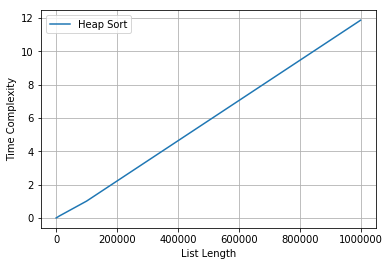

In [18]:
%matplotlib inline
import time 
from numpy.random import seed 
from numpy.random import randint 
import matplotlib.pyplot as plt

elements = list() 
times = list() 
for i in range(1, 7): 
    a = randint(0, 10 ** i, 10 ** i) 
    start = time.clock() 
    heapSort(a) 
    end = time.clock() 
  
    print(len(a), "Elements Sorted by HeapSort in ", end-start) 
    elements.append(len(a)) 
    times.append(end-start) 
  
plt.xlabel('List Length') 
plt.ylabel('Time Complexity') 
plt.plot(elements, times, label ='Heap Sort') 
plt.grid() 
plt.legend() 
plt.show() 

### 堆排序的复杂度分析


| | |
|---|---|
| Worst-case performance | $O(n log n)$ |
| Best-case performance	| $O(n log n)$(distinct keys) or $O(n)$ (equal keys)|
| Average performance | $O(n log n)$ |
| Worst-case space complexity | $O(n)$ tatal $O(1)$ auxiliary |

- 堆排序时一个原地排序算法
- 排序的两个阶段中建堆时间复杂度是$O(n)$，排序的时间复杂度是$O(n log n)$，所以整体时间复杂度是 $O(n log n)$
- 堆排序不是稳定的排序算法，因为在排序时堆顶元素会和最后一个节点发生交换，这时可能会改变相同元素原有的相对顺序

### 堆排序 v.s. 快速排序

- 快速排序的数据访问方式是顺序访问，堆排序的数据访问方式是不是顺序访问（近似随机访问），所以堆排序对CPU缓存并不友好 [[参考]](https://people.freebsd.org/~lstewart/articles/cpumemory.pdf)
- 相同的数据在排序过程中，堆排序的交换次数要多余快排序
- 所以一般来说快速排序的性能更好

## 优先队列

- 根据优先级的高低来决定出列的顺序，不在遵循普通队列先进后出的原则
- 一般用堆来实现

### Python中的优先队列

- [heapq](https://docs.python.org/3/library/heapq.html)
- [PriorityQueue](https://docs.python.org/3/library/queue.html#priority-queue)

### 优先队列的应用

- 高性能定时器
- 将有序的小文件进行合并
- 数据流中找出topk
- 求数据流中的中位数（分位数）

数据结构 | 插入的时间复杂度 | 得到中位数的时间复杂度 
:-- | :-- | :-- 
没有排序的数组 | O(1) | O(n) 
排序的数组 | O(n) | O(1) 
排序的链表 | O(n) | O(1) 
二叉搜索树 | 平均O(logn)，最差O(n) | 平均O(logn)，最差O(n) 
AVL树 | O(logn) | O(1) 
最大堆和最小堆 | O(logn) | O(1)

## B+树


- 常用于数据库中的索引
- 

# 完结，撒花！

- 本课程还会继续更新
- 学好数据结构和算法需要多练习
- Computer Science系列课程的后续
- Machine Learning系列课程的安排